<div style="background-color: orange; padding: 10px; text-align: center;">
<h1 style="font-weight: bold; font-style: italic;">Life Expectancy WHO
    </h1>
   
</div>


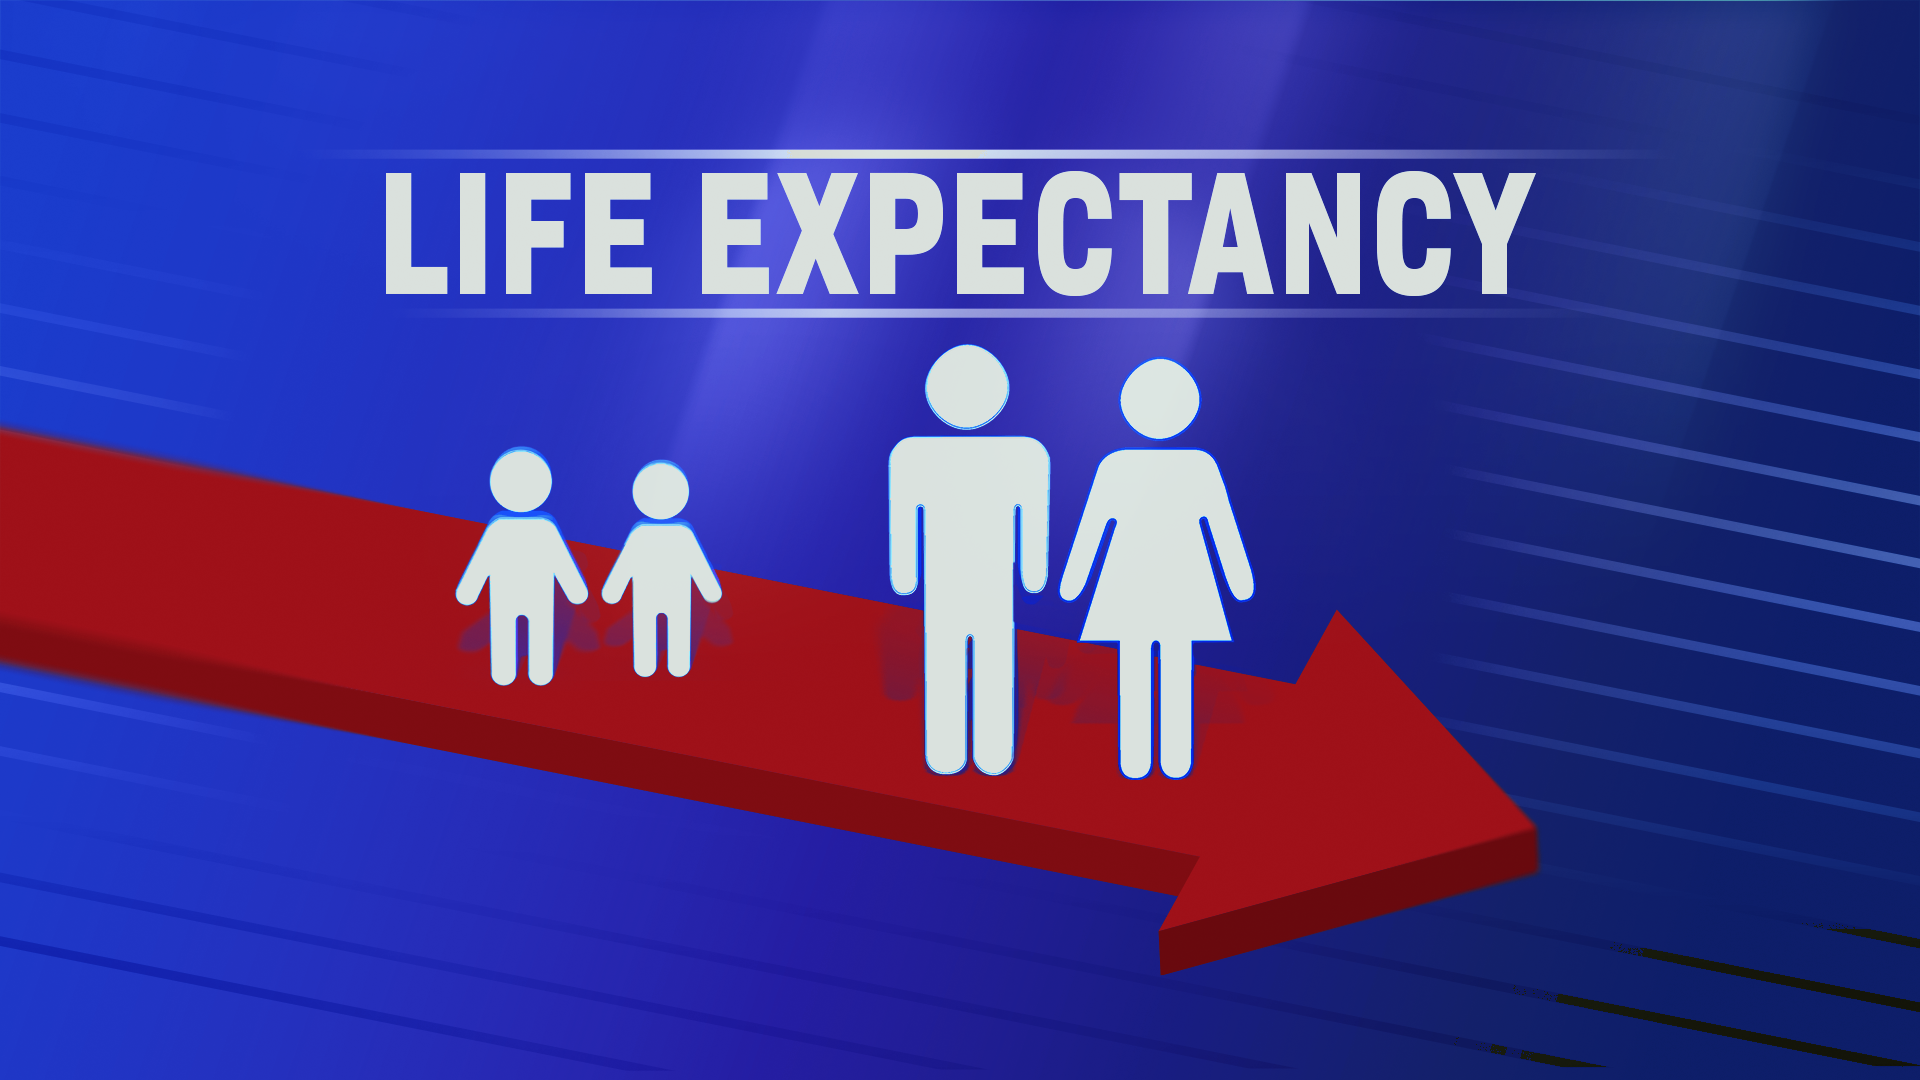

#### Considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
life=pd.read_csv('./Life Expectancy Data.csv')
life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
import klib as k
k.clean_column_names(life)

Long column names detected (>25 characters). Consider renaming the following columns ['income_composition_of_resources'].


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
life.isnull().mean()*100

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.340368
adult_mortality                     0.340368
infant_deaths                       0.000000
alcohol                             6.603131
percentage_expenditure              0.000000
hepatitis_b                        18.822328
measles                             0.000000
bmi                                 1.157250
under_five_deaths                   0.000000
polio                               0.646698
total_expenditure                   7.692308
diphtheria                          0.646698
hiv_aids                            0.000000
gdp                                15.248468
population                         22.191967
thinness_1_19_years                 1.157250
thinness_5_9_years                  1.157250
income_composition_of_resources     5.684139
schooling                           5.547992
dtype: flo

In [6]:
life.dropna(inplace=True)

In [7]:
life.duplicated().sum()

0

In [8]:
life.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1649.0,2.007841e+03,4.087711e+00,2000.00000,2005.000000,2.008000e+03,2.011000e+03,2.015000e+03
life_expectancy,1649.0,6.930230e+01,8.796834e+00,44.00000,64.400000,7.170000e+01,7.500000e+01,8.900000e+01
adult_mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant_deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage_expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
hepatitis_b,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
bmi,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01
under_five_deaths,1649.0,4.422013e+01,1.628980e+02,0.00000,1.000000,4.000000e+00,2.900000e+01,2.100000e+03


### Univariate analysis;

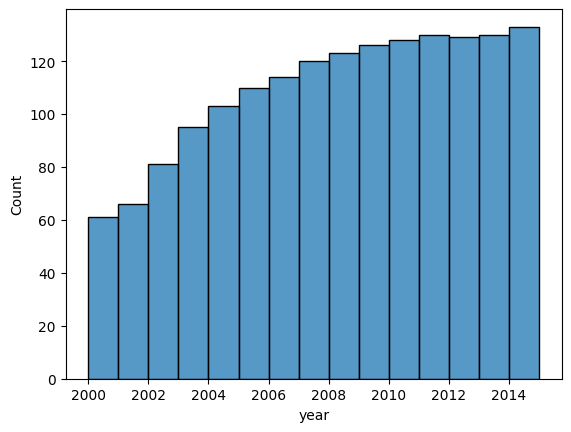

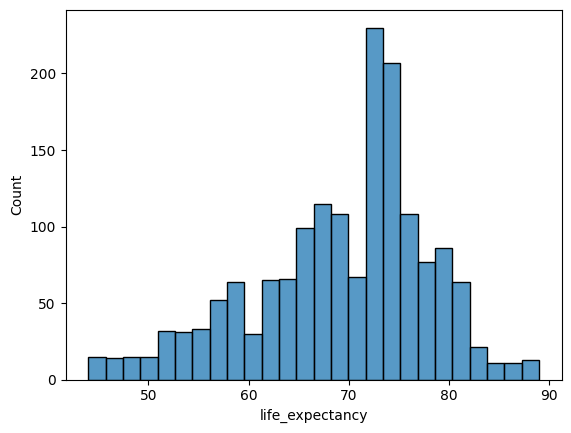

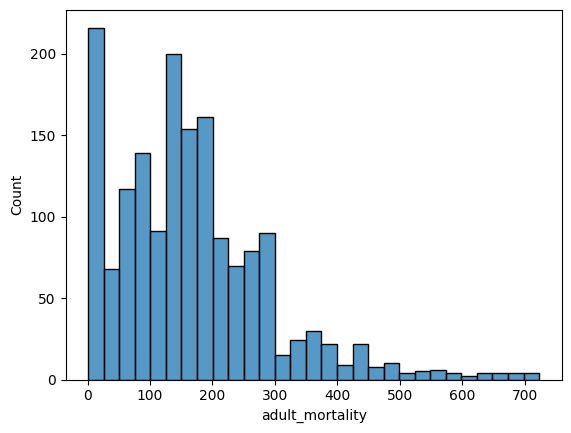

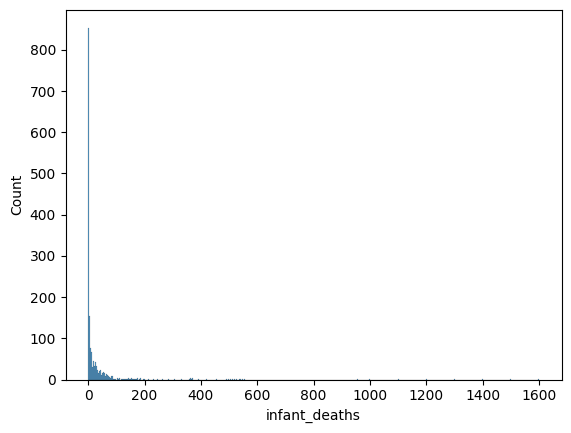

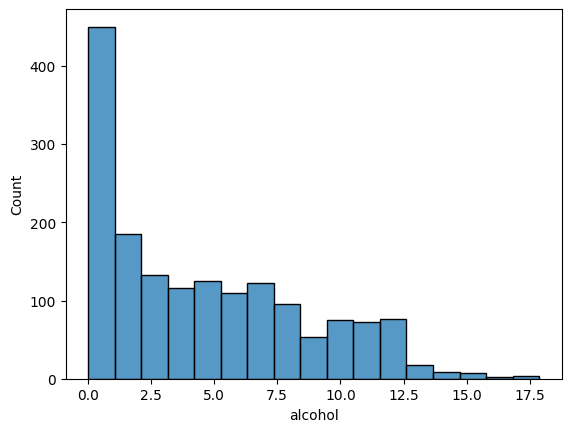

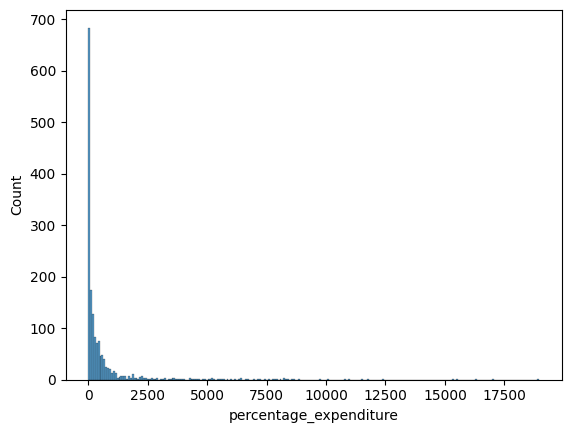

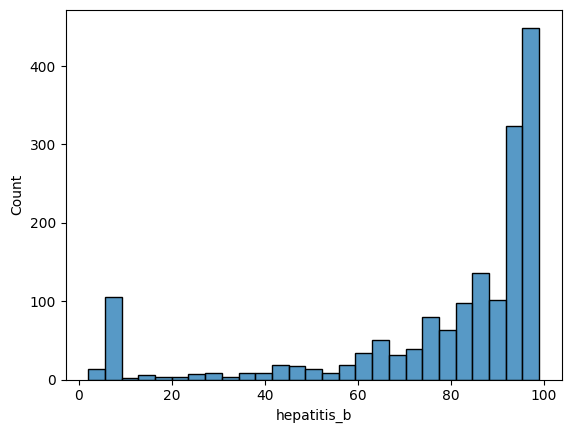

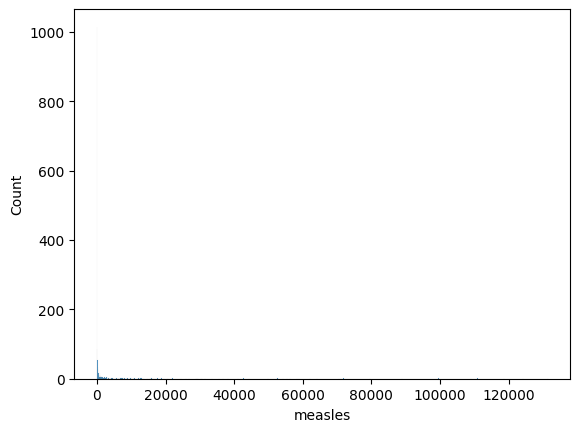

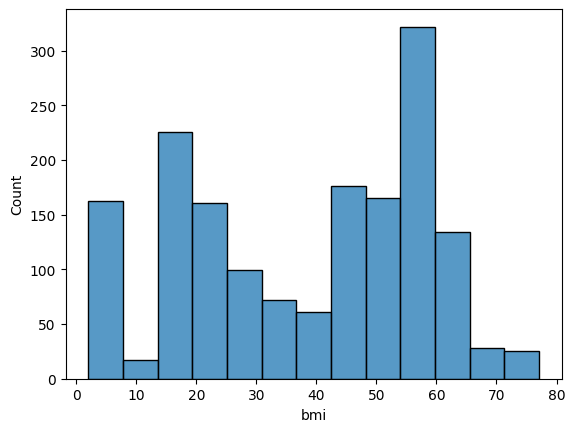

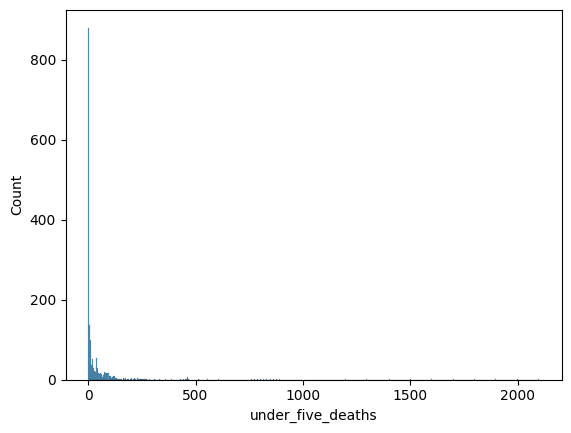

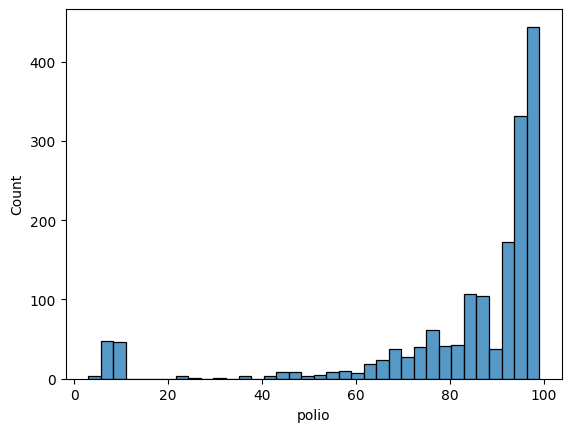

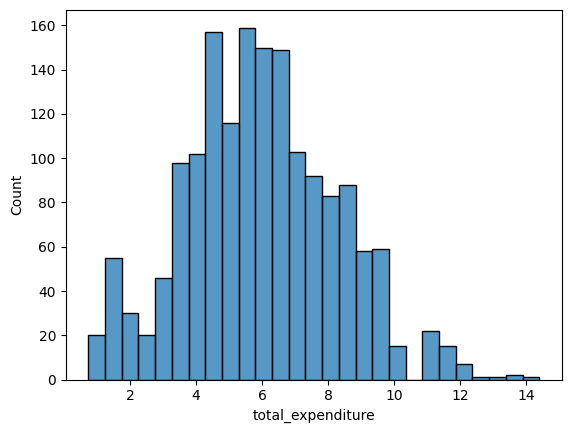

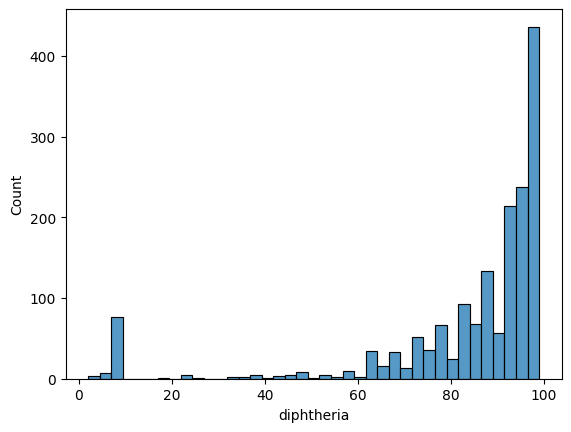

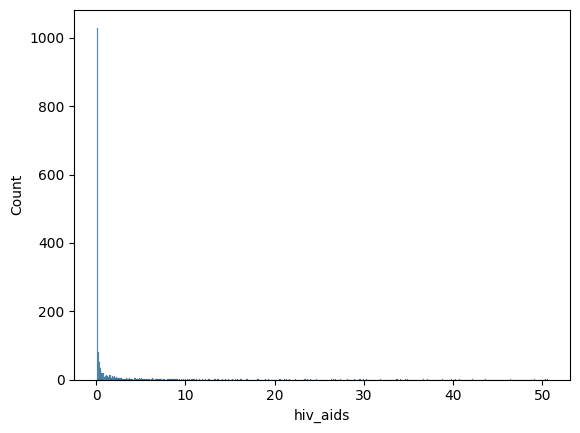

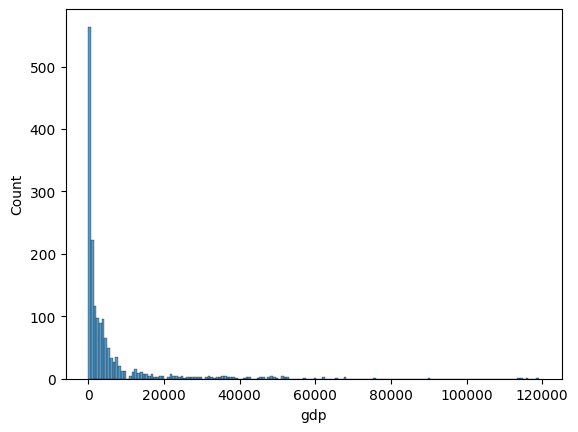

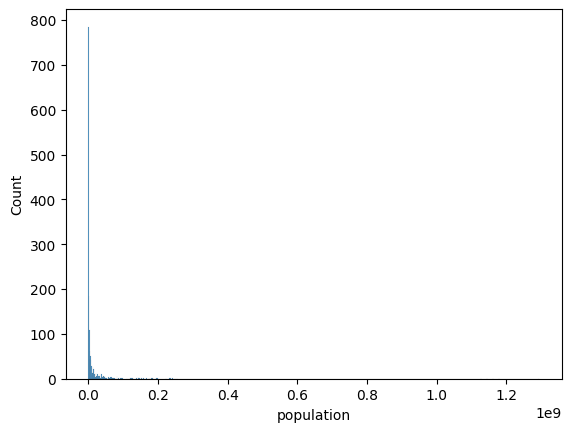

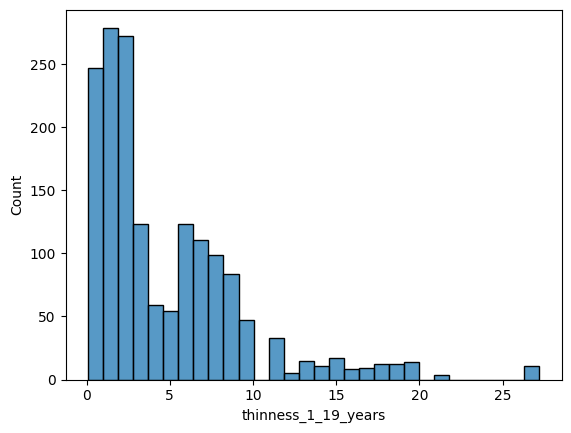

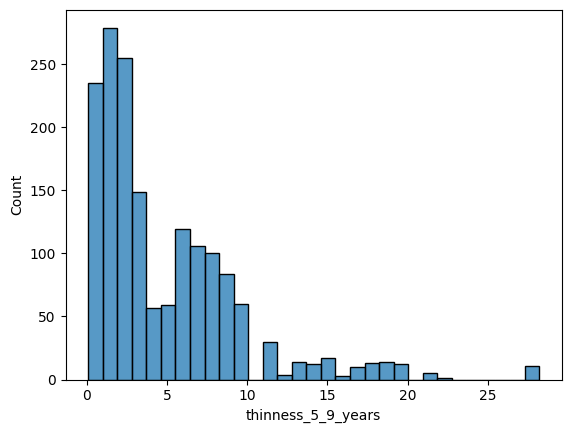

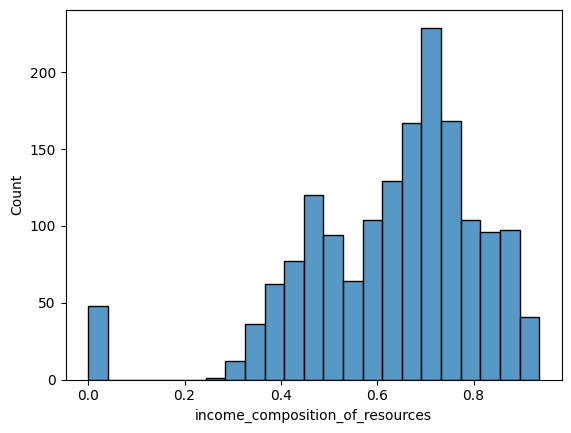

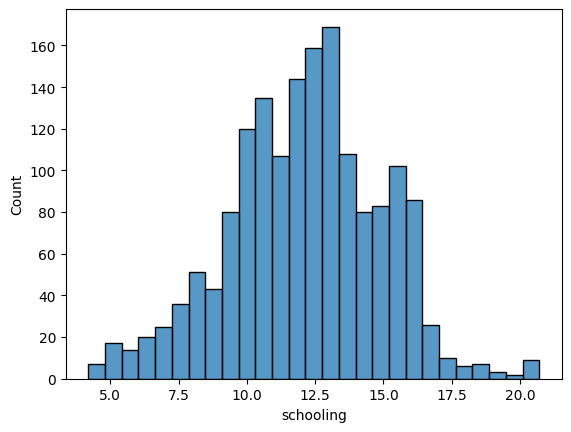

In [9]:
for i in life.columns:
    if life[i].dtypes !="object":
        sns.histplot(x= life[i])
        plt.show()

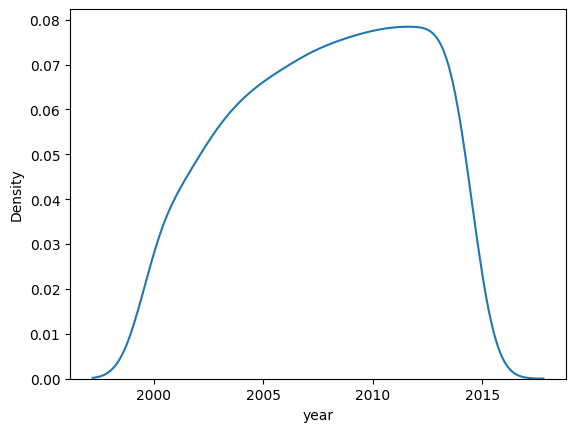

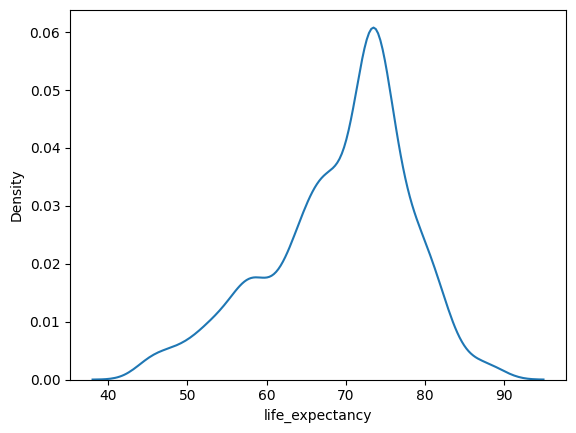

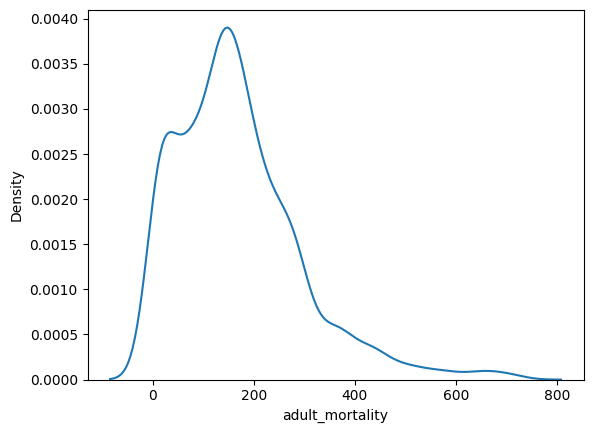

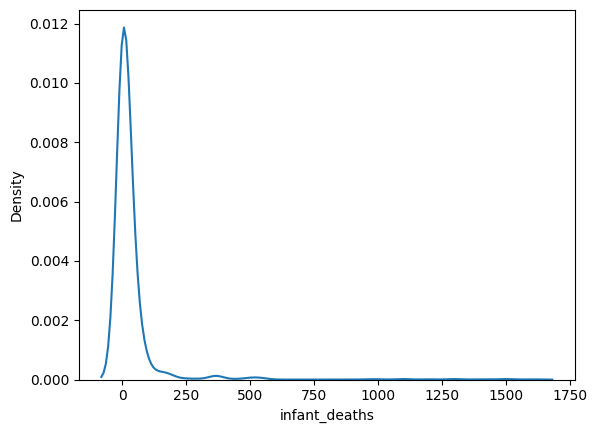

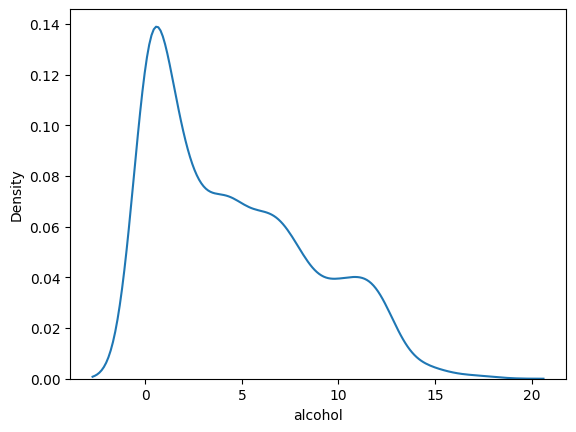

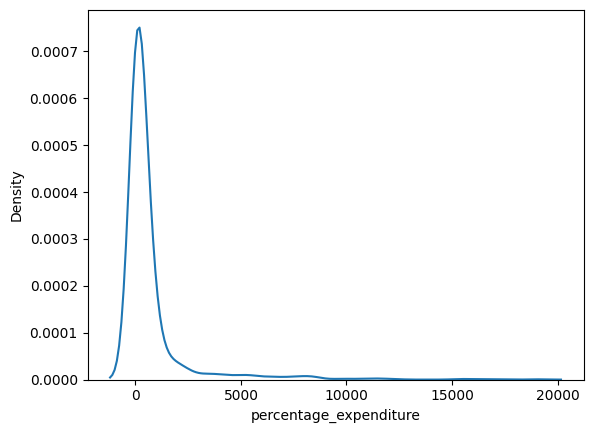

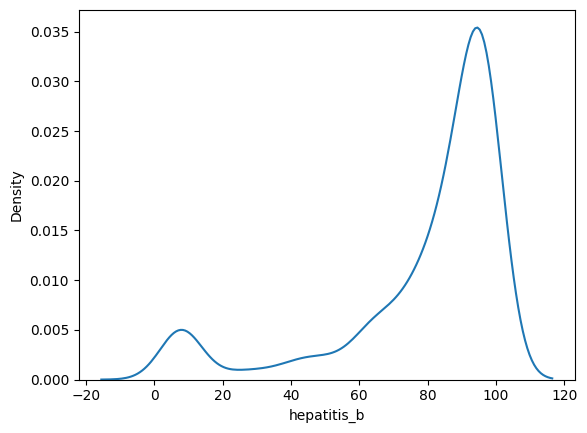

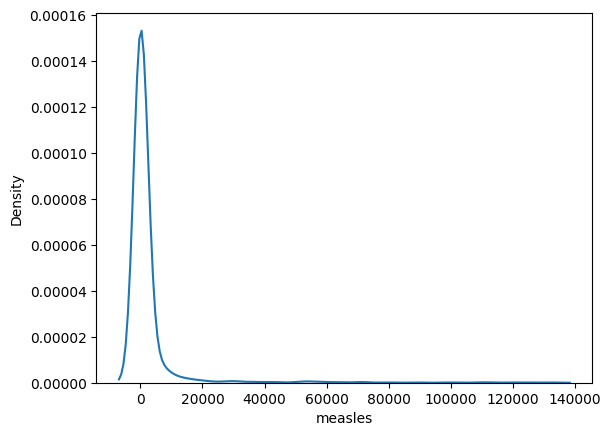

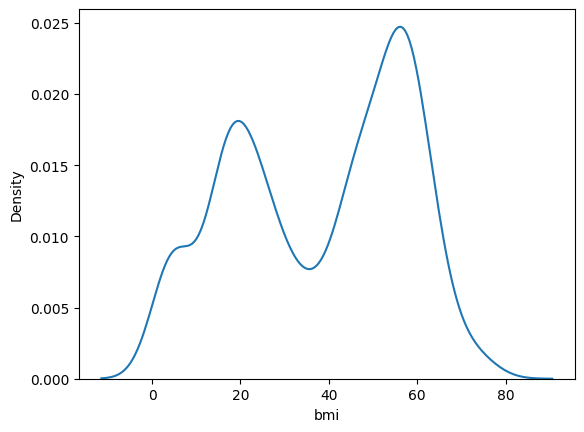

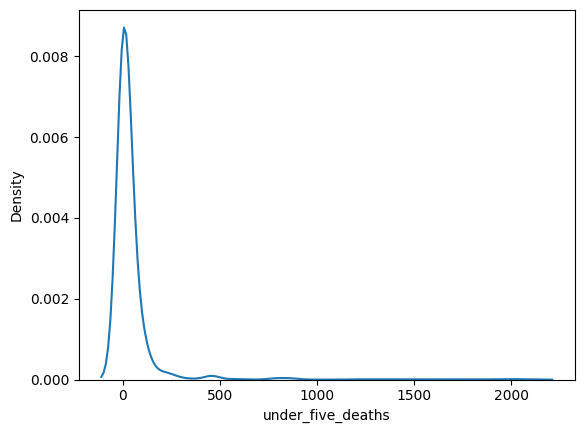

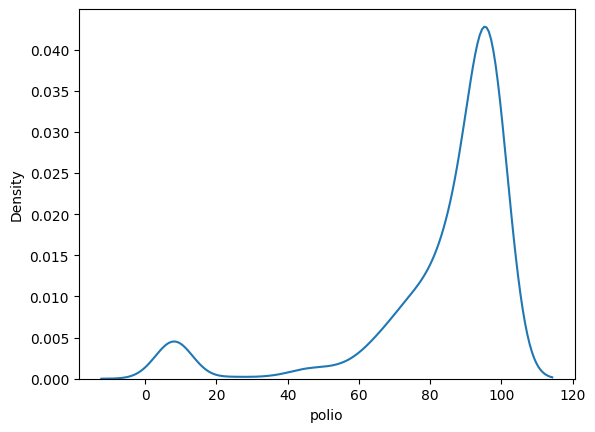

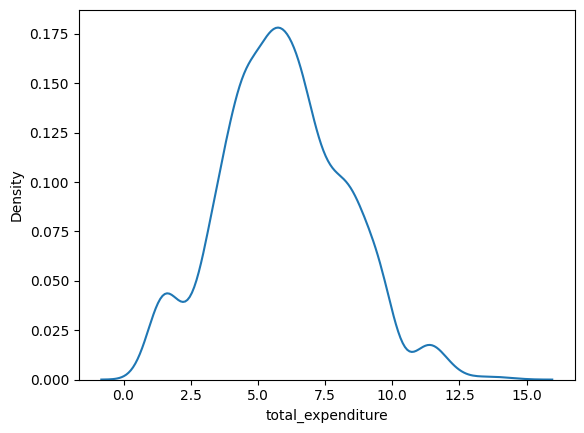

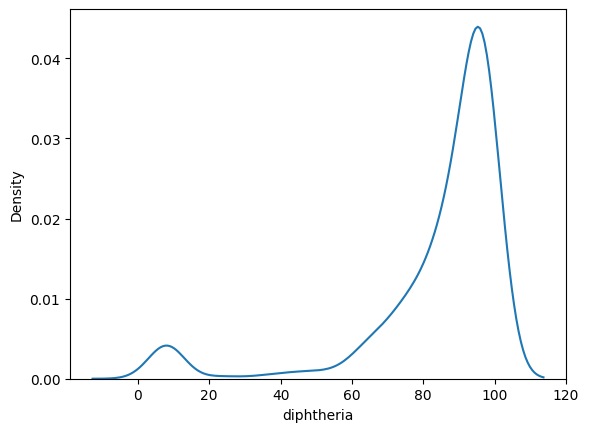

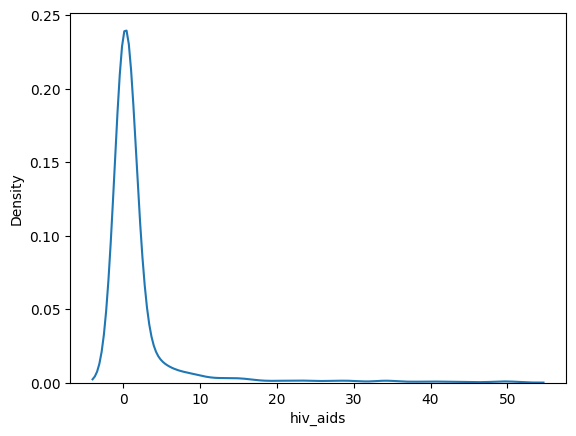

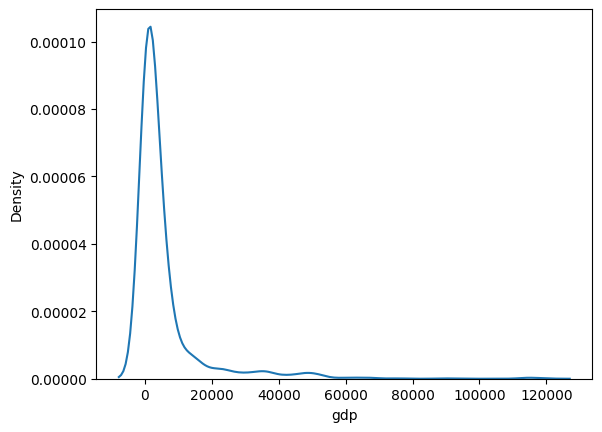

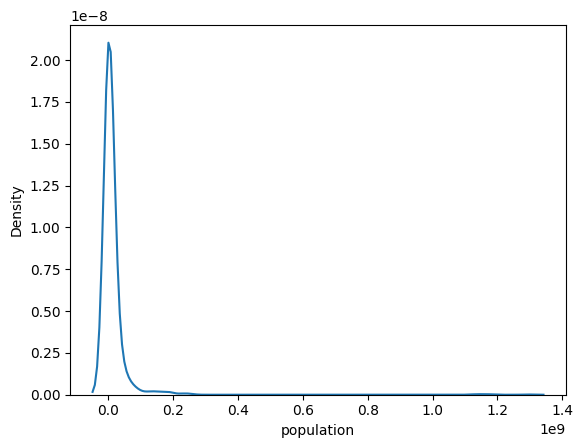

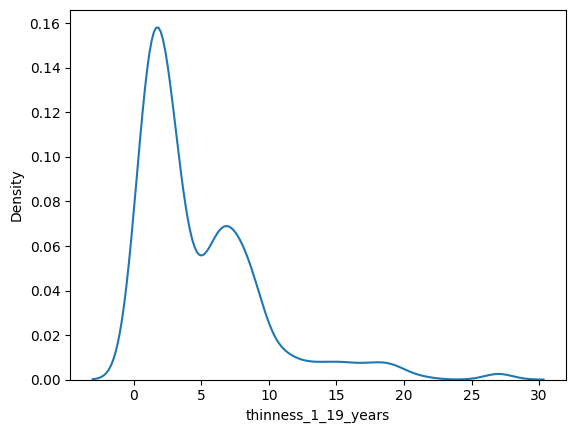

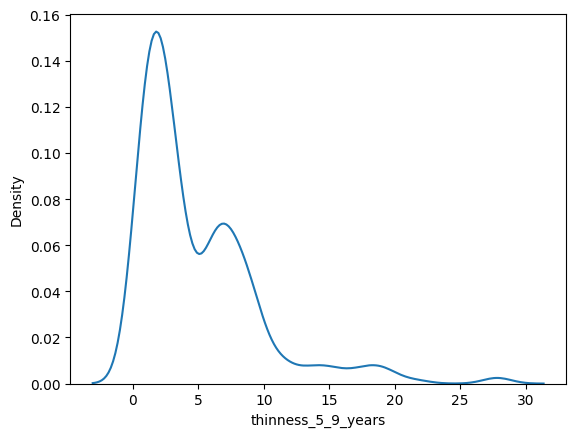

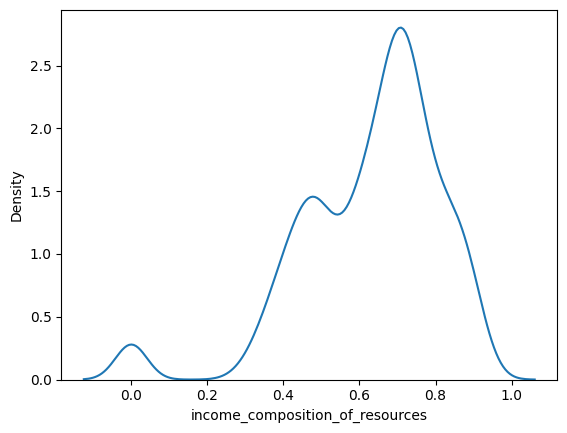

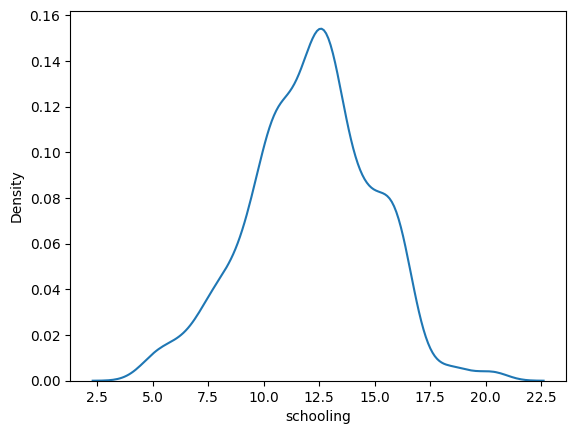

In [10]:
for i in life.columns:
    if life[i].dtypes !="object":
        sns.kdeplot(x= life[i])
        plt.show()

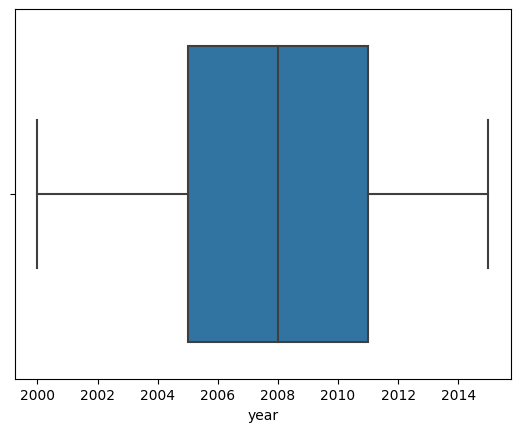

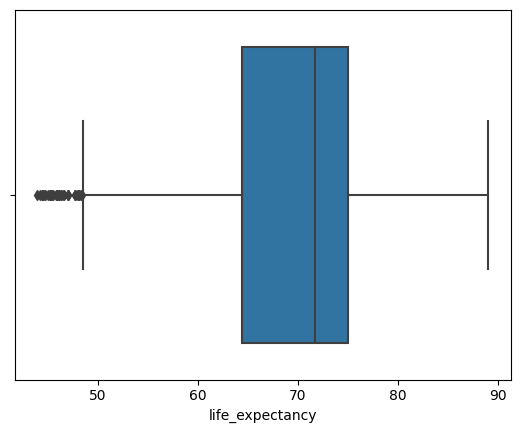

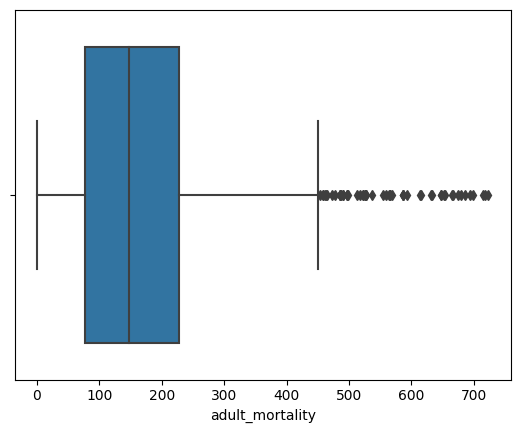

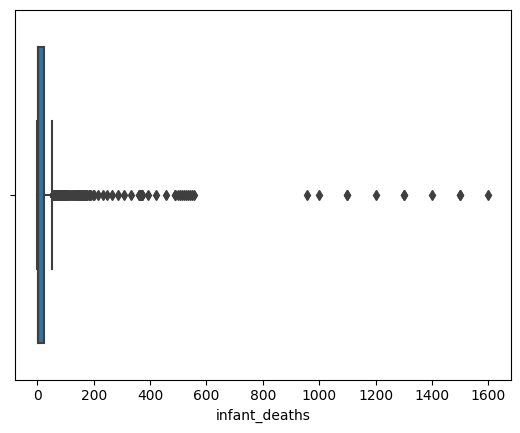

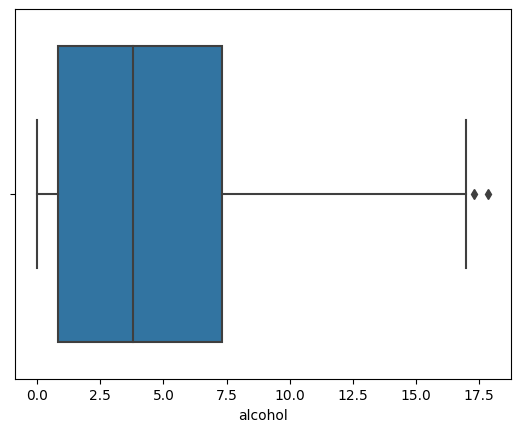

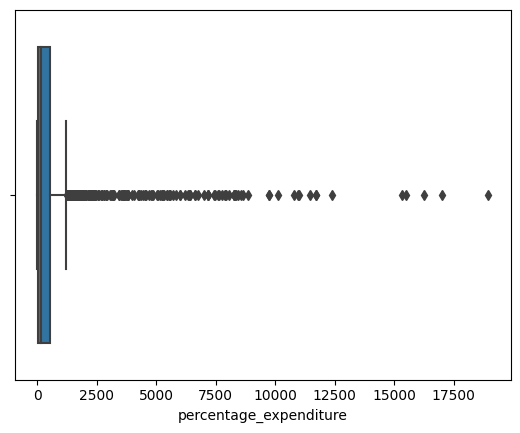

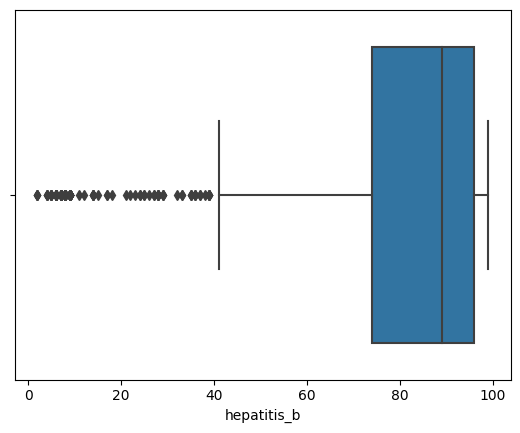

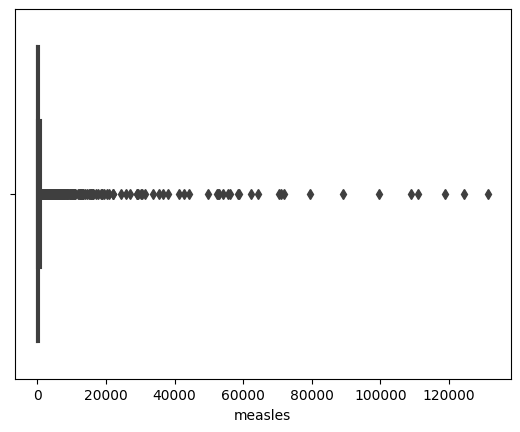

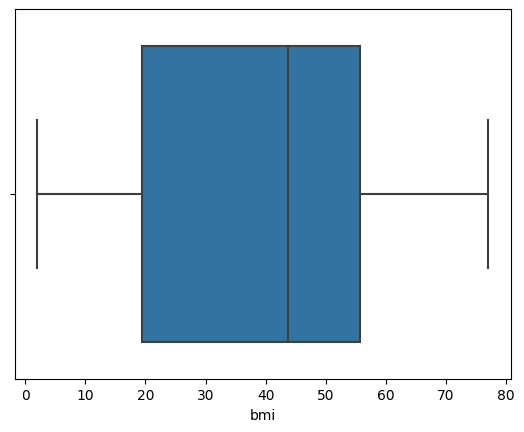

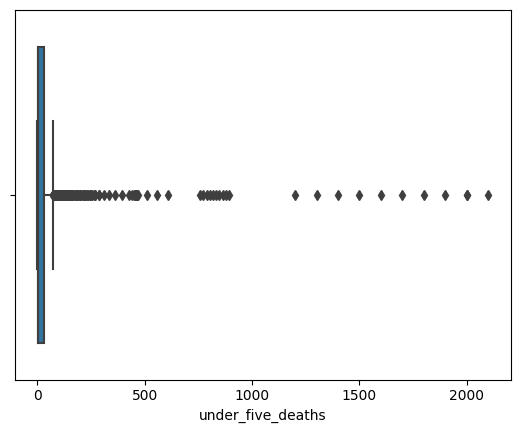

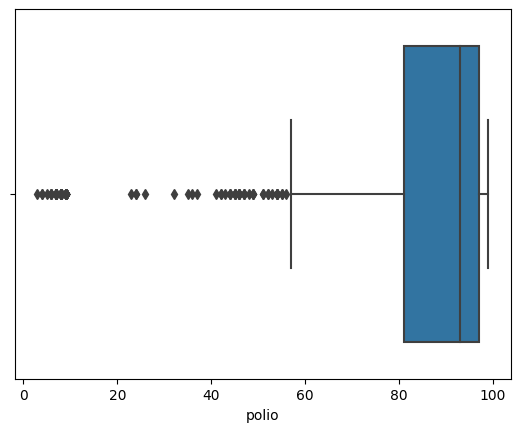

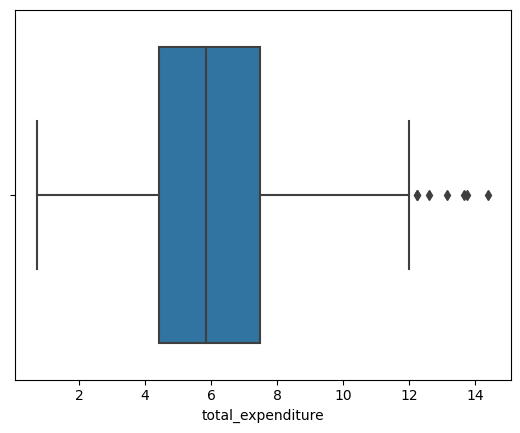

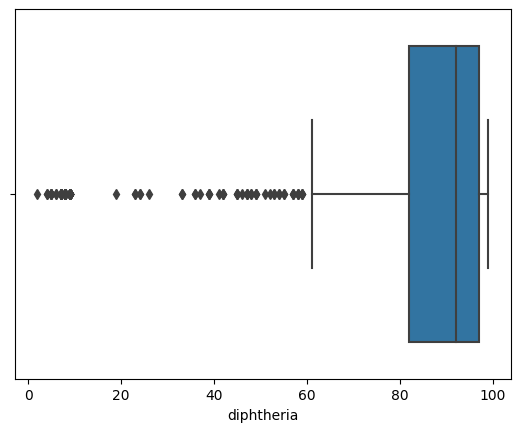

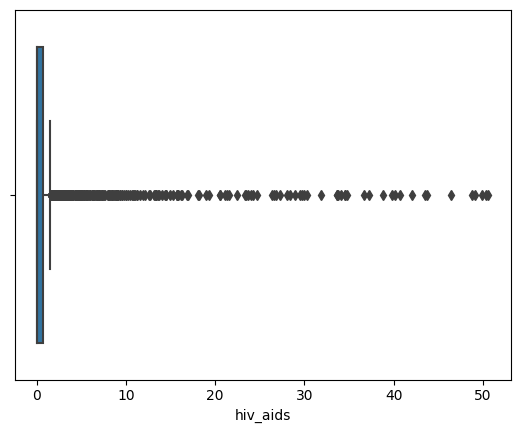

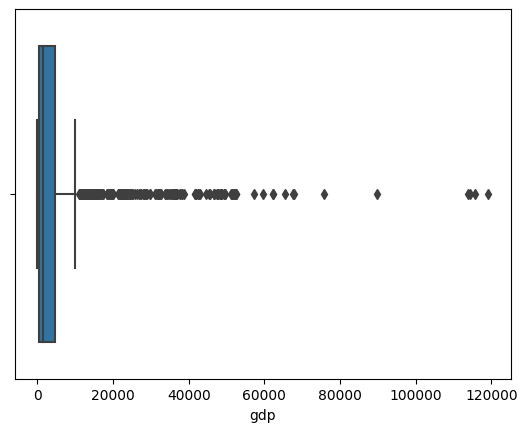

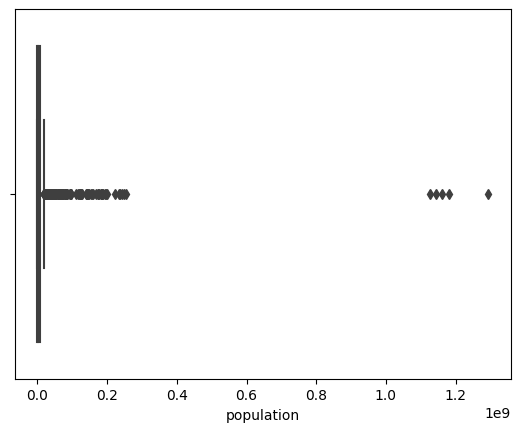

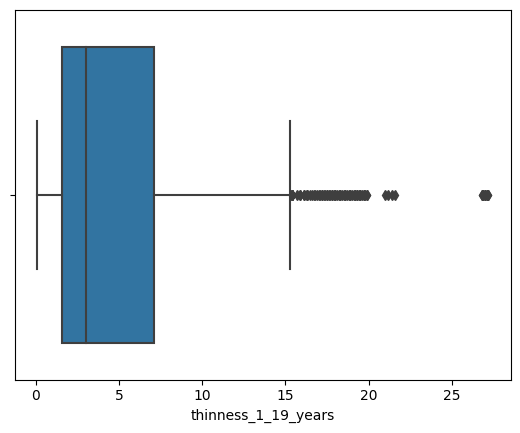

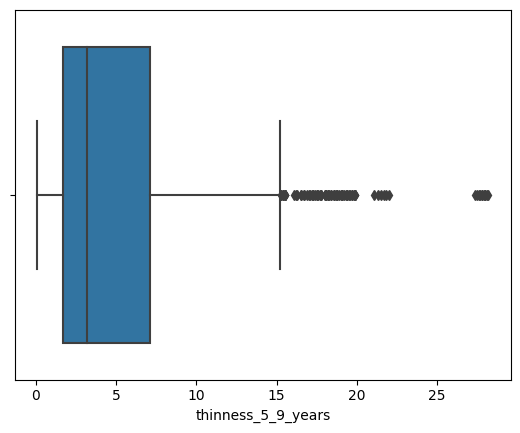

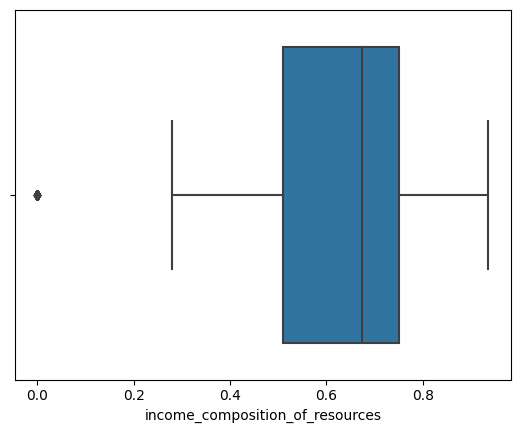

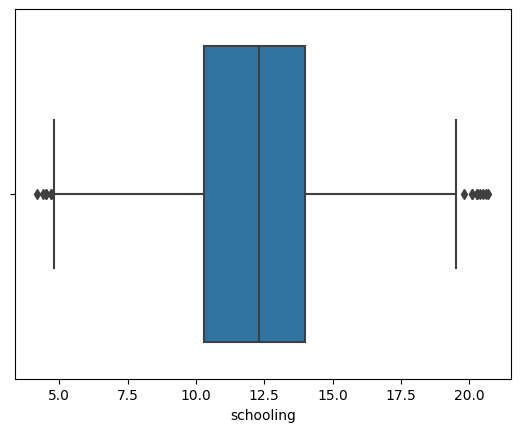

In [11]:
for i in life.columns:
    if life[i].dtypes !="object":
        sns.boxplot(x= life[i])
        plt.show()

### Setting the outlier limits

In [12]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [13]:
for i in life.columns:
    if life[i].dtypes != "object":
        UL,LL = outlier_limit(life[i])
        life[i] = np.where((life[i]>UL)|(life[i]<LL), np.nan, life[i])

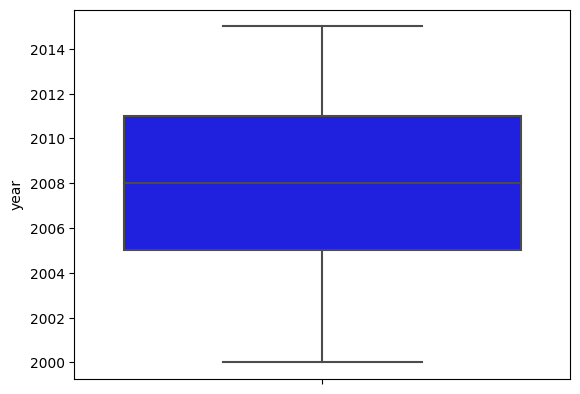

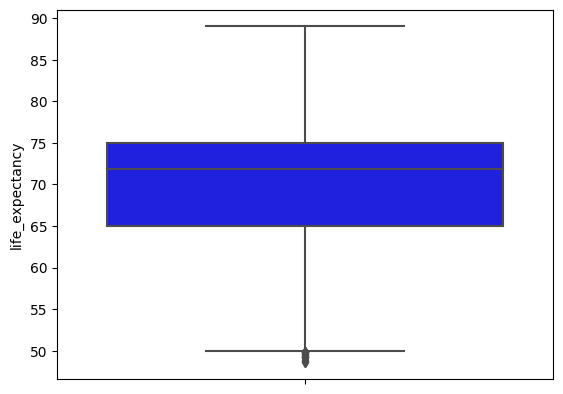

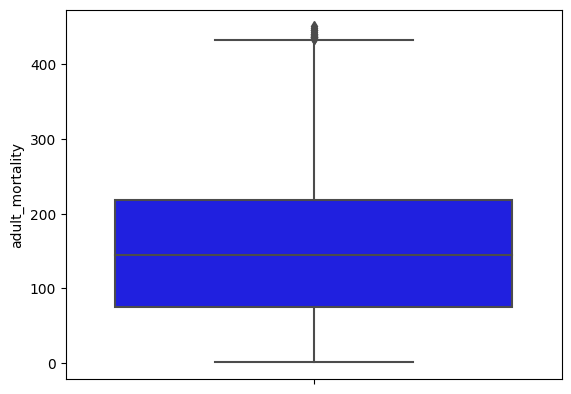

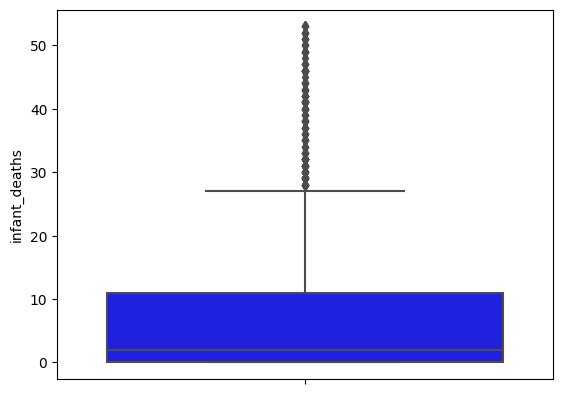

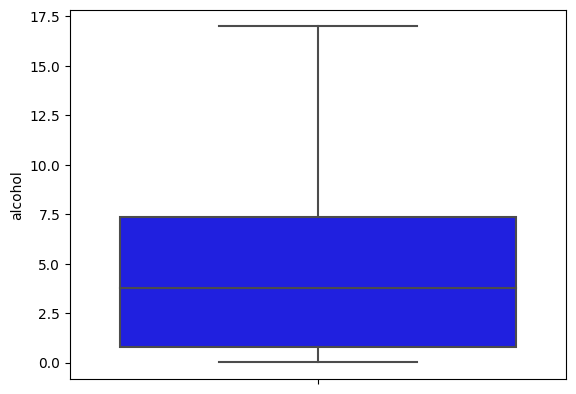

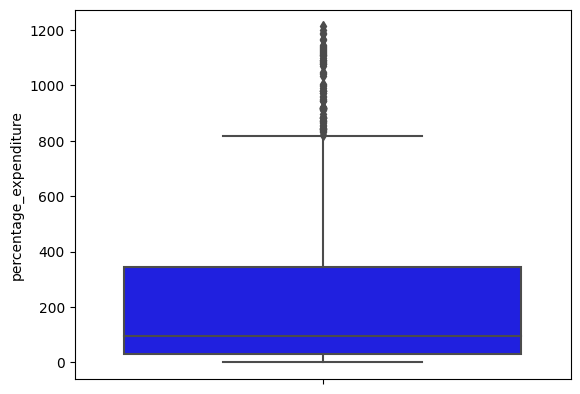

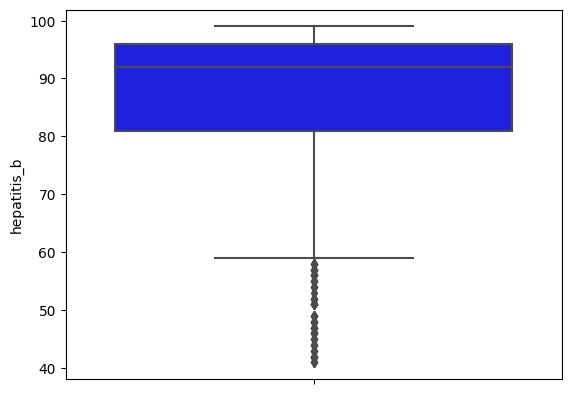

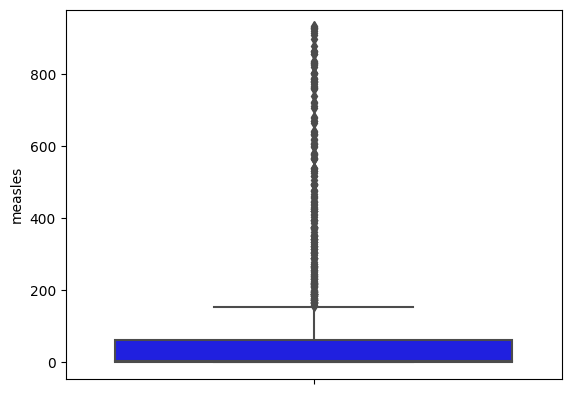

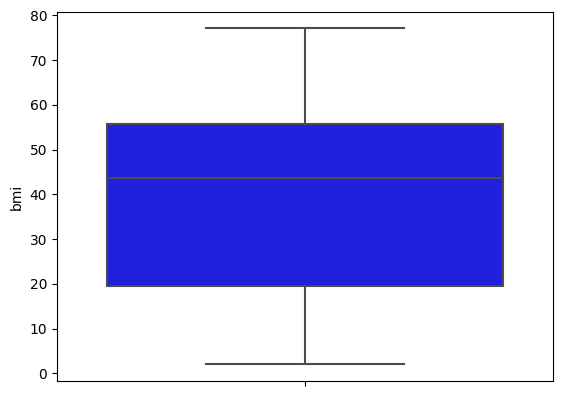

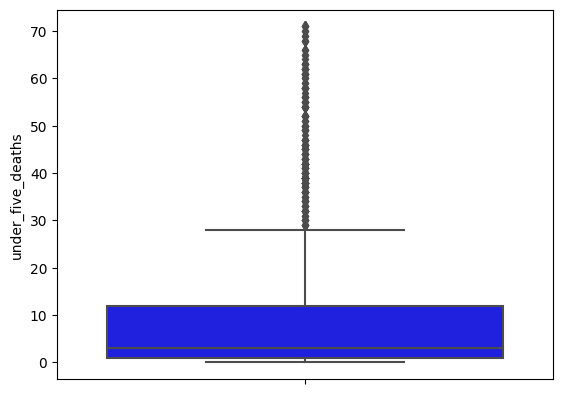

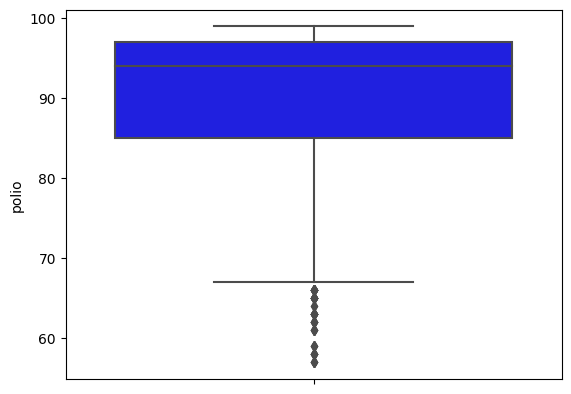

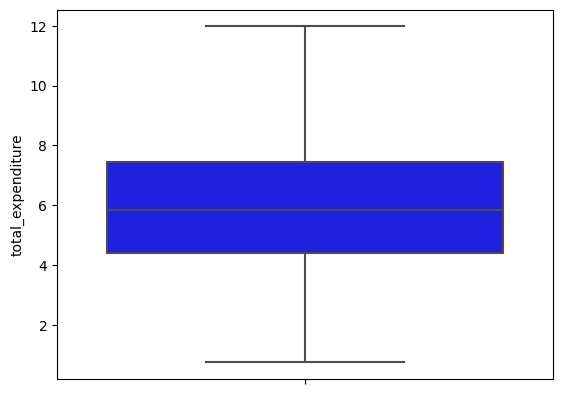

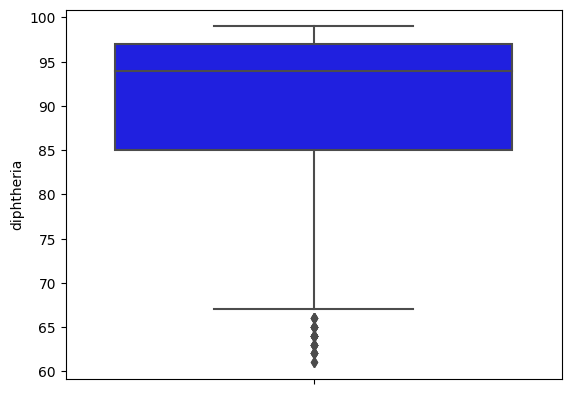

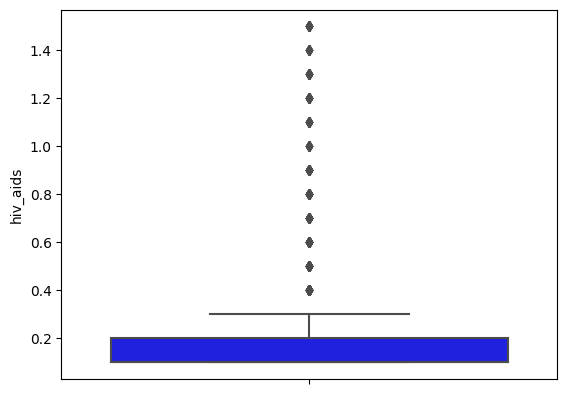

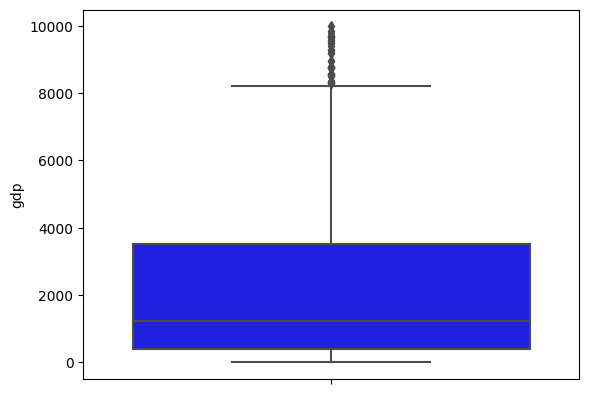

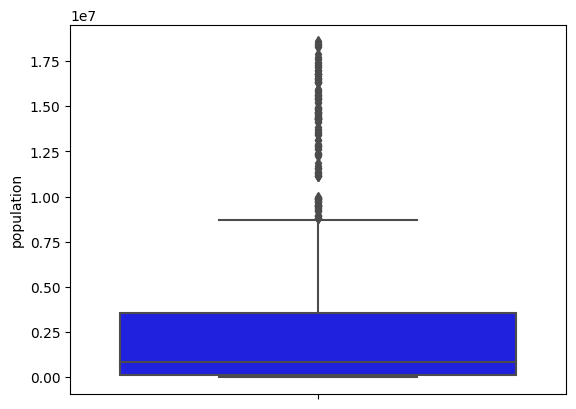

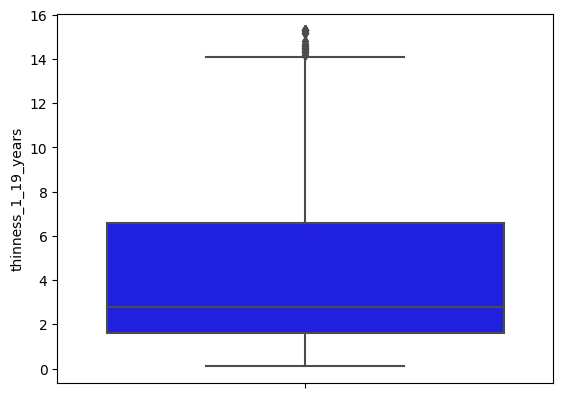

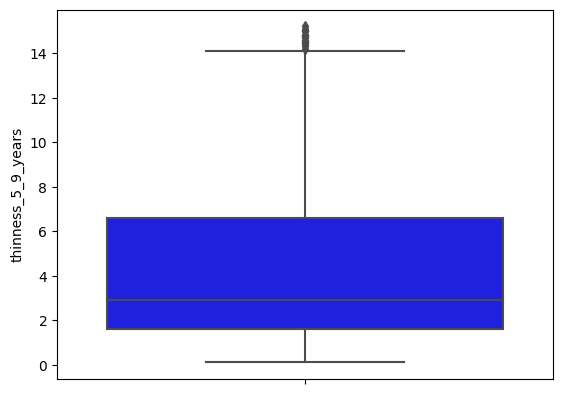

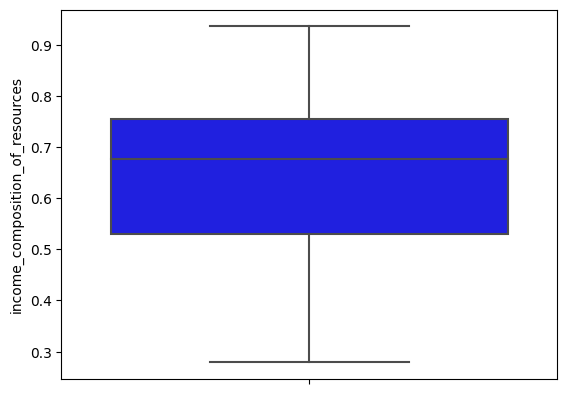

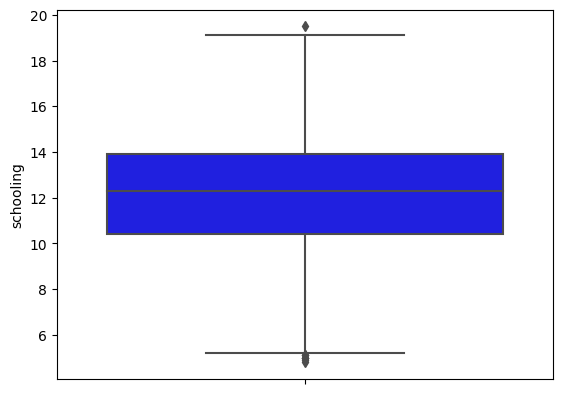

In [14]:
for i in life.columns:
    if life[i].dtypes != "object":
        sns.boxplot(y = life[i], color="blue")
        plt.show()

In [15]:
life.isnull().mean()*100

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     2.365070
adult_mortality                     3.274712
infant_deaths                      12.067920
alcohol                             0.121286
percentage_expenditure             11.340206
hepatitis_b                        10.006064
measles                            18.010916
bmi                                 0.000000
under_five_deaths                  13.462705
polio                               8.611280
total_expenditure                   0.424500
diphtheria                          8.126137
hiv_aids                           18.132201
gdp                                12.613705
population                         14.129776
thinness_1_19_years                 4.669497
thinness_5_9_years                  4.730139
income_composition_of_resources     2.910855
schooling                           0.970285
dtype: flo

In [16]:
life.dropna(inplace=True)

### Label encoding the categorical columns

In [17]:
le=LabelEncoder()

In [18]:
life['country']=le.fit_transform(life['country'])
life['status']=le.fit_transform(life['status'])

#### Change column into date time format

In [19]:
life['year']=pd.to_datetime(life.year)

In [20]:
life.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 16 to 2851
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   country                          646 non-null    int32         
 1   year                             646 non-null    datetime64[ns]
 2   status                           646 non-null    int32         
 3   life_expectancy                  646 non-null    float64       
 4   adult_mortality                  646 non-null    float64       
 5   infant_deaths                    646 non-null    float64       
 6   alcohol                          646 non-null    float64       
 7   percentage_expenditure           646 non-null    float64       
 8   hepatitis_b                      646 non-null    float64       
 9   measles                          646 non-null    float64       
 10  bmi                              646 non-null    float64    

### Checking the correlation with the target 'life_expectancy'

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

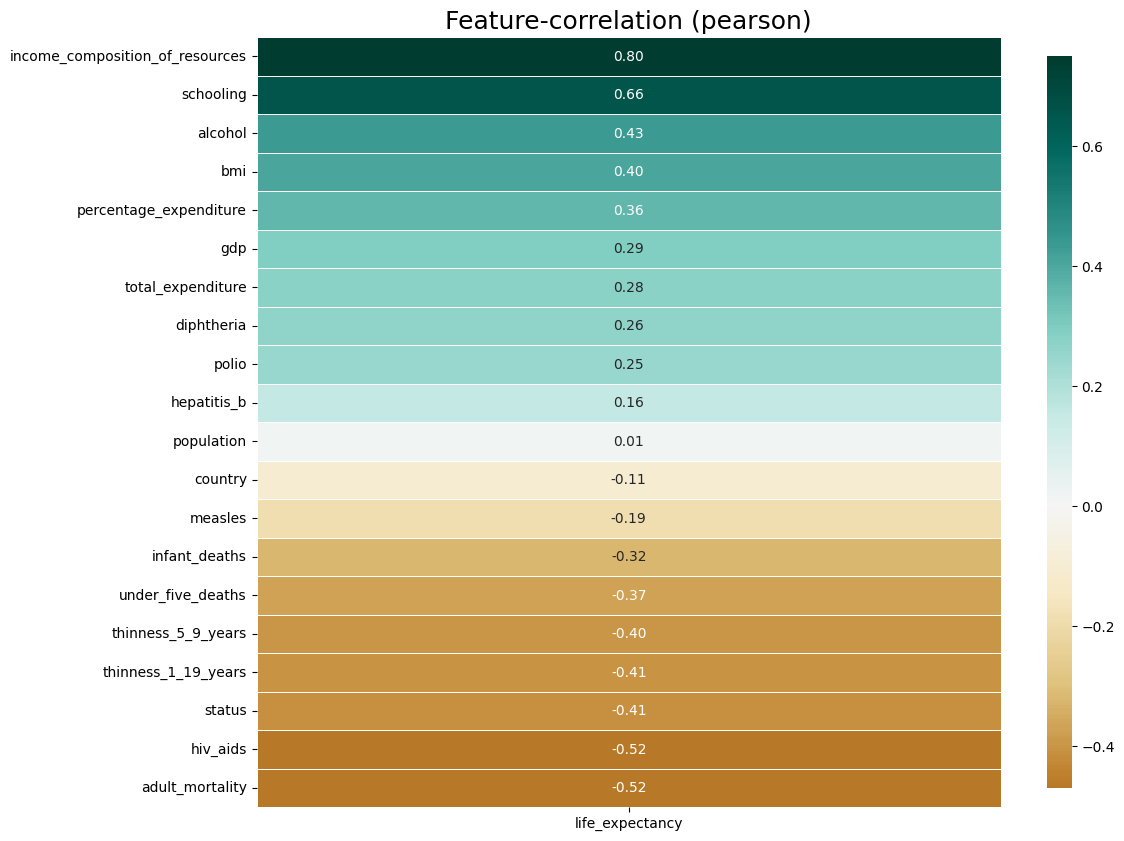

In [37]:
import klib as k
k.corr_plot(data=life, target='life_expectancy')

#### Lets take only the columns with good correlation with the target

In [22]:
x=life[['income_composition_of_resources','schooling','alcohol']].values
y=life[['life_expectancy']].values

### Feature Scaling

In [23]:
sc = StandardScaler()
x = sc.fit_transform(x)

### Splitting the data into training and testing set

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor 
from sklearn.svm import LinearSVR

In [26]:
models={
    "linearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "Lasso":Lasso(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "BaggingRegressor":BaggingRegressor(),
    "HistgradientBoostingRegressor":HistGradientBoostingRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0)
}

In [27]:
for name,model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score=model.score(x_train, y_train)*100
    testing_score=model.score(x_test, y_test)*100
    score= r2_score(y_test, model.predict(x_test))*100
    mae=mean_absolute_error(y_test, model.predict(x_test))
    mse=mean_squared_error(y_test, model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score:",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test:",rmse)
    print("*"*100)

model trained with linearRegression
r2score: 64.30555101538957
training_score: 65.32719311968329
testing_score: 64.30555101538957
mae: 2.504819198494617
mse: 9.977265914031697
rmse_test: 3.1586810402495056
****************************************************************************************************
model trained with Ridge
r2score: 64.24917358753109
training_score: 65.32433329723735
testing_score: 64.24917358753109
mae: 2.5092064053229173
mse: 9.99302445927597
rmse_test: 3.1611745379330087
****************************************************************************************************
model trained with LinearSVR
r2score: 60.622583768180526
training_score: 63.457855710178194
testing_score: 60.622583768180526
mae: 2.68087624813428
mse: 11.00672412457634
rmse_test: 3.317638335409142
****************************************************************************************************
model trained with Lasso
r2score: 59.43471407323202
training_score: 60.42770408342193
testing_sc

In [28]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : linearRegression
AVERAGE RMSE:  3.192223363994192
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  3.192611588347357
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  3.265664764467278
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  3.415572520615401
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  3.3417076987918493
****************************************************************************************************
cross validation model : BaggingRegressor
AVERAGE RMSE:  3.6704736462753
******************************************************************

#### We can see that Linear Regression is having the best overall performance so far. We may proceed with it.

In [29]:
LR = LinearRegression()

In [30]:
LR.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = LR.predict(x_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
mse

9.977265914031697

In [33]:
rmse = np.sqrt(mse)
rmse

3.1586810402495056

In [34]:
y_pred=model.predict(x)


In [35]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,77.8,77.655
1,77.5,77.617
2,77.2,77.136
3,76.9,76.615
4,76.6,76.019


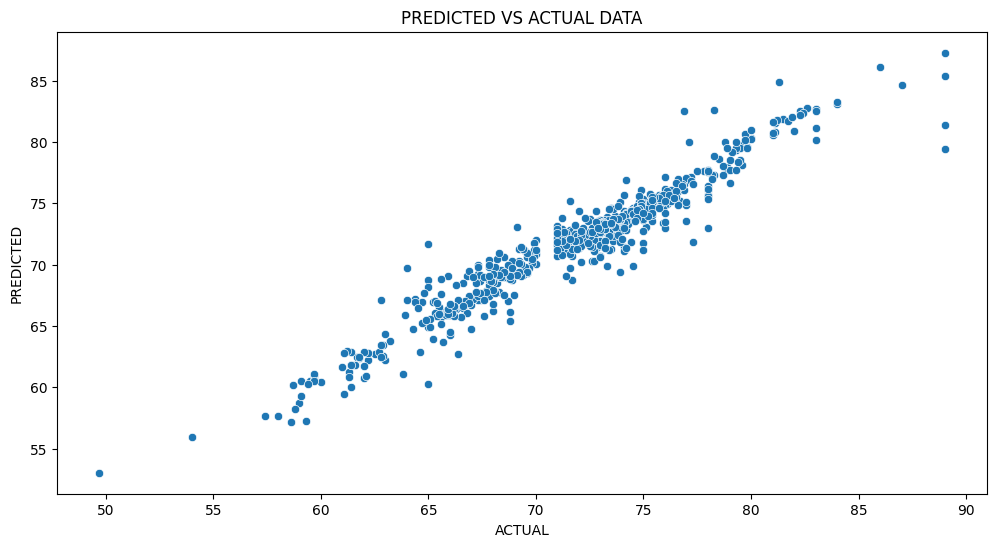

In [36]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");